# Hacker News

Hacker News is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

You can find the data set [here](https://www.kaggle.com/hacker-news/hacker-news-posts), but note that we have reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions. Below are descriptions of the columns:

    id: the unique identifier from Hacker News for the post
    title: the title of the post
    url: the URL that the posts links to, if the post has a URL
    num_points: the number of points the post acquired, calculated as the   total number of upvotes minus the total number of downvotes
    num_comments: the number of comments on the post
    author: the username of the person who submitted the post
    created_at: the date and time of the post's submission


In [1]:
from csv import reader

In [2]:
open_csv = open('hacker_news.csv')
read = reader(open_csv)
hn = list(read)

In [3]:
# First five itmes of the list
hn[0:5]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

In [4]:
# Extracting the headers
headers = hn[:1]
headers

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]

In [5]:
# Creating a new list without the headers
hn = hn[1:]
hn[0:5]

[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12']]

In [6]:
# Creating 3 empty lists as a place holder
ask_posts = []
show_posts = []
other_posts = []

In [7]:
# Filetering the list of lists using the ".startswith('')" method
for row in hn:
    title = row[1].lower()
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

In [8]:
total_ask_comments = 0
count = 0
for row in ask_posts:
    total_ask_comments+= int(row[4])
    count+=1

In [9]:
print('Total ask comments:',total_ask_comments)
print('Print total count:',count)

Total ask comments: 24483
Print total count: 1744


In [10]:
avg_ask_comments = total_ask_comments/count
avg_ask_comments

14.038417431192661

In [11]:
total_show_comments = 0
show_count = 0
for row in show_posts:
    total_show_comments+= int(row[4])
    show_count+=1

In [12]:
avg_show_comments = total_show_comments/count
avg_show_comments

6.873853211009174

#### Ask posts receive more comments on average than average show comments

In [13]:
#Importaing Pyhton datatime module as dt
import datetime as dt

In [14]:
result_list = []

In [15]:
for row in ask_posts:
    time_and_comments = [row[6],int(row[4])]
    result_list.append(time_and_comments)
    

In [16]:
result_list[:10]

[['8/16/2016 9:55', 6],
 ['11/22/2015 13:43', 29],
 ['5/2/2016 10:14', 1],
 ['8/2/2016 14:20', 3],
 ['10/15/2015 16:38', 17],
 ['9/26/2015 23:23', 1],
 ['4/22/2016 12:24', 4],
 ['11/16/2015 9:22', 1],
 ['2/24/2016 17:57', 1],
 ['6/4/2016 17:17', 2]]

In [17]:
counts_by_hour = {}
comments_by_hour = {}

In [18]:
for row in result_list:
    date_time_str = row[0]
    num_of_comments = row[1]
    date_time_obj = dt.datetime.strptime(date_time_str, '%m/%d/%Y %H:%M')
    hour = date_time_obj.strftime('%H')
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_of_comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour]+= num_of_comments
    #date, hour = row[0].split()
    #print(hour)
    #dateTimeobj = dt.datetime.strptime(row[0],'%m/%d/%Y %H:%M')
    #time = hour.strftime(hour,'%I:%M')

In [19]:
counts_by_hour

{'09': 45,
 '13': 85,
 '10': 59,
 '14': 107,
 '16': 108,
 '23': 68,
 '12': 73,
 '17': 100,
 '15': 116,
 '21': 109,
 '20': 80,
 '02': 58,
 '18': 109,
 '03': 54,
 '05': 46,
 '19': 110,
 '01': 60,
 '22': 71,
 '08': 48,
 '04': 47,
 '00': 55,
 '06': 44,
 '07': 34,
 '11': 58}

In [20]:
comments_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1439,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 447,
 '06': 397,
 '07': 267,
 '11': 641}

In [21]:
avg_by_hour = []

In [22]:
def fetch_hourly_comments(key):
    if key in comments_by_hour:
        return comments_by_hour[key]
      
for key,value in counts_by_hour.items():
    avg_by_hour.append([key, fetch_hourly_comments(key)/value])
    

In [23]:
avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [24]:
swap_avg_by_hour = []

In [25]:
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

In [26]:
swap_avg_by_hour

[[5.5777777777777775, '09'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [16.796296296296298, '16'],
 [7.985294117647059, '23'],
 [9.41095890410959, '12'],
 [11.46, '17'],
 [38.5948275862069, '15'],
 [16.009174311926607, '21'],
 [21.525, '20'],
 [23.810344827586206, '02'],
 [13.20183486238532, '18'],
 [7.796296296296297, '03'],
 [10.08695652173913, '05'],
 [10.8, '19'],
 [11.383333333333333, '01'],
 [6.746478873239437, '22'],
 [10.25, '08'],
 [7.170212765957447, '04'],
 [8.127272727272727, '00'],
 [9.022727272727273, '06'],
 [7.852941176470588, '07'],
 [11.051724137931034, '11']]

In [27]:
swap_avg_by_hour.sort(reverse = True)

In [28]:
swap_avg_by_hour

[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [13.20183486238532, '18'],
 [11.46, '17'],
 [11.383333333333333, '01'],
 [11.051724137931034, '11'],
 [10.8, '19'],
 [10.25, '08'],
 [10.08695652173913, '05'],
 [9.41095890410959, '12'],
 [9.022727272727273, '06'],
 [8.127272727272727, '00'],
 [7.985294117647059, '23'],
 [7.852941176470588, '07'],
 [7.796296296296297, '03'],
 [7.170212765957447, '04'],
 [6.746478873239437, '22'],
 [5.5777777777777775, '09']]

In [29]:
print("Top 5 Hours for Ask Posts Comments:\n",swap_avg_by_hour[0:5])

Top 5 Hours for Ask Posts Comments:
 [[38.5948275862069, '15'], [23.810344827586206, '02'], [21.525, '20'], [16.796296296296298, '16'], [16.009174311926607, '21']]


In [30]:
for row in swap_avg_by_hour[0:5]:
    print("{}:00: {:.2f} average comments per post".format(row[1], row[0]))

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


In [31]:
for row in swap_avg_by_hour[0:5]:
    time_obj = dt.datetime.strptime(row[1], '%H')
    time_format = time_obj.strftime('%H:%M')
    print("{}: {:.2f} average comments per post".format(time_format, row[0]))

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


# Findings:

Based on this data, we can infer that the optimal time for audience to (engage in social media or) post comments is at 15:00. Where it can be seen a spike in the public engagement. The least optimal time would be from mid-night till the mid-day. This trend can also be observed from the figure below.

This data can be useful for the users who want to increase their social media  engagement as this shows the best to worst time to post.

In [32]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [36]:
# Creating a copy of the list
list_to_csv = avg_by_hour.copy()
list_to_csv

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [48]:
# Adding column names
list_to_csv.insert(0,['hours', 'avg_comments'])
list_to_csv

[['hours', 'avg_comments'],
 ['hours', 'avg_comments'],
 ['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [38]:
# Converting the list to csv
df = pd.DataFrame(list_to_csv)
df.to_csv('list.csv',index=False)

# Reading the data
df = pd.read_csv('list.csv',index_col=False,header=1)

In [39]:
# Sorting the data frame highest to lowest values
sorted_df = df.sort_values(
     by="avg_comments",
     ascending=False)

In [40]:
sorted_df

,hours,avg_comments
8,15,38.594828
11,2,23.810345
10,20,21.525000
4,16,16.796296
9,21,16.009174
1,13,14.741176
2,10,13.440678
3,14,13.233645
12,18,13.201835
7,17,11.460000


[Text(0.5, 0, 'Hours (24-hour format)'), Text(0, 0.5, 'Average Comments')]

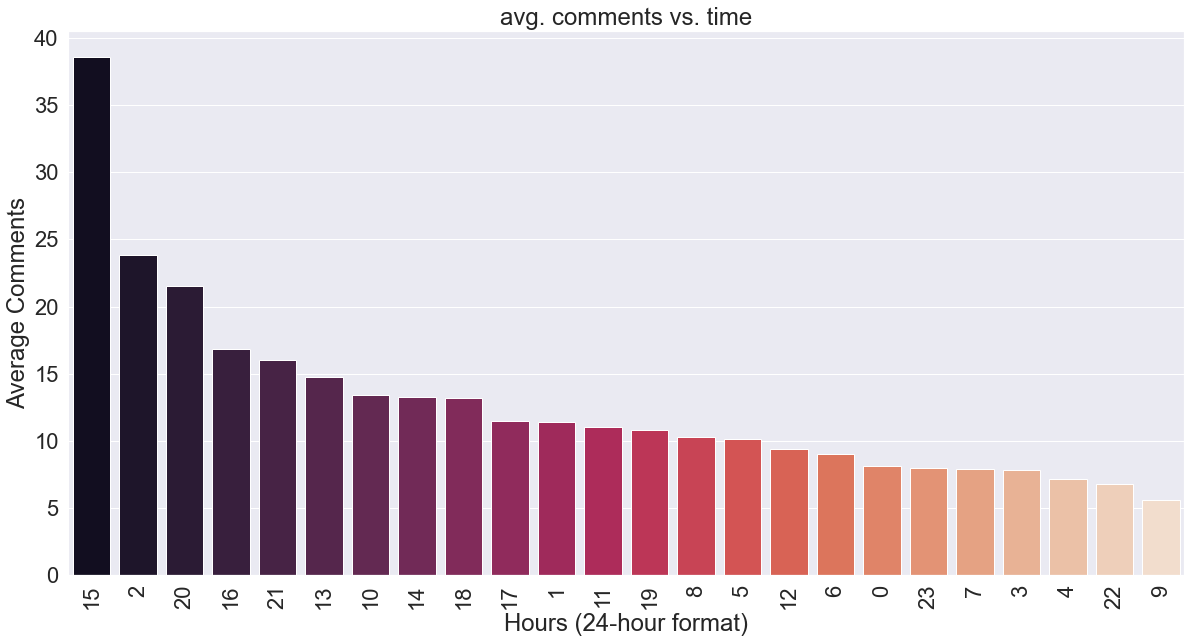

In [47]:
# Setting the size of the canvas 
fig_dims = (20, 10) 

# Setting the background color of the canvas
sns.set_style("darkgrid")  

# Setting the font size of the labels
sns.set(font_scale = 2)  

# Unpacking the tuple
fig, ax = plt.subplots(figsize=fig_dims)

# Rotating the xticks to 45 degrees
ax.tick_params(axis='x', rotation=90)   

# Plotting the barplot
sns.barplot(x="hours", y="avg_comments", data=sorted_df, order=sorted_df['hours'], palette = ("rocket")).set_title("avg. comments vs. time")

ax.set(xlabel="Hours (24-hour format)", ylabel = "Average Comments")